<a href="https://colab.research.google.com/github/kk0mtl/computer-vision/blob/mlp-mm/MLP_%ED%96%89%EB%A0%AC%EA%B3%B1%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms

In [2]:
# test 용으로 사용
mnist_test = dset.MNIST("", train=False, transform=transforms.ToTensor(),
                        target_transform=None, download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 9912422/9912422 [00:00<00:00, 15929641.52it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 454355.40it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 1648877/1648877 [00:00<00:00, 4407336.71it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6429473.09it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



mnist_test 길이 :  10000
image data 형태 :  torch.Size([1, 28, 28])
label :  7


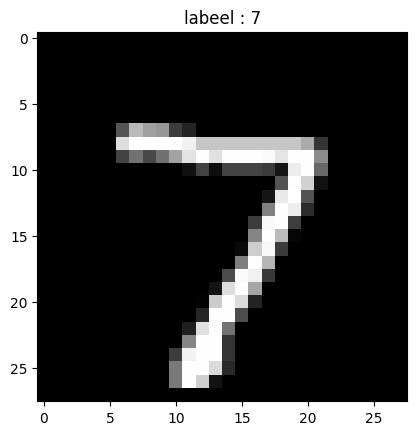

In [3]:
print("mnist_test 길이 : ", len(mnist_test))

image, label = mnist_test.__getitem__(0)
print("image data 형태 : ", image.size())
print("label : ", label)

img = image.numpy()
plt.title("labeel : %d" % label)
plt.imshow(img[0], cmap="gray")
plt.show()

In [4]:
# vector implimentation
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [5]:
def softmax(x):
  exp_x = np.exp(x)
  exp_sum = np.sum(exp_x)
  return exp_x / exp_sum

In [6]:
# W1 : (256, 785)
# W2 : (128, 257)
# W3 : (10, 129)
#
class MyMLP:
  def __init__(self, n_input, n_hidden1, n_hidden2, n_output):
    self.W1 = np.zeros((n_hidden1, n_input), dtype=np.float32)
    self.b1 = np.zeros((n_hidden1, ), dtype=np.float32)

    self.W2 = np.zeros((n_hidden2, n_hidden1), dtype=np.float32)
    self.b2 = np.zeros((n_hidden2, ), dtype=np.float32)

    self.W3 = np.zeros((n_output, n_hidden2), dtype=np.float32)
    self.b3 = np.zeros((n_output, ), dtype=np.float32)

  def __call__(self, x):
    x = x.reshape(-1)

    h1 = sigmoid(np.dot(self.W1, x) + self.b1)
    h2 = np.dot(self.W2, h1) + self.b2
    out = np.dot(self.W3, h2) + self.b3

    return softmax(out)

In [7]:
model = MyMLP(28*28, 256, 128, 10)

print(model.W1.shape, model.b1.shape)
print(model.W2.shape, model.b2.shape)
print(model.W3.shape, model.b3.shape)

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


In [8]:
weights = np.load('./nets/mlp_weight.npz')
model.W1 = weights['W1']
model.b1 = weights['b1']
model.W2 = weights['W2']
model.b2 = weights['b2']
model.W3 = weights['W3']
model.b3 = weights['b3']

print(model.W1.shape, model.b1.shape)
print(model.W2.shape, model.b2.shape)
print(model.W3.shape, model.b3.shape)

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


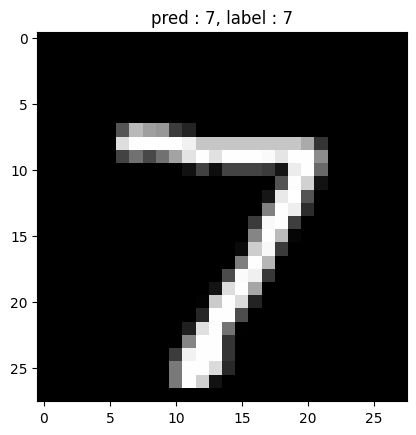

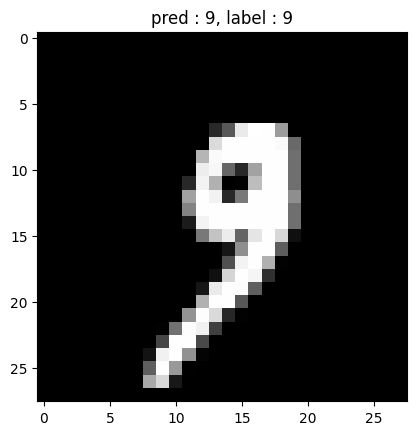

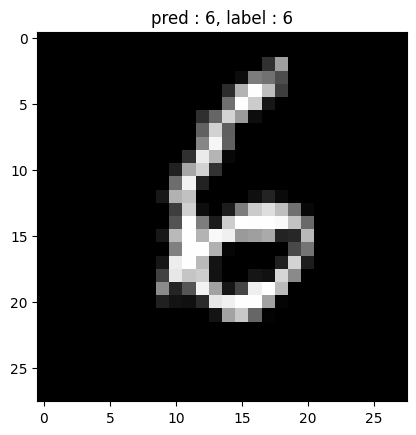

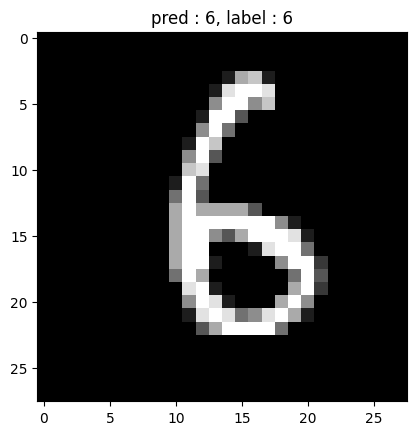

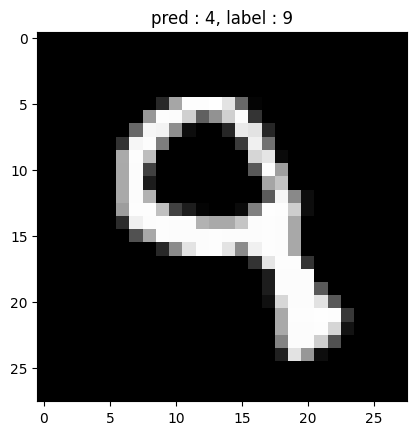

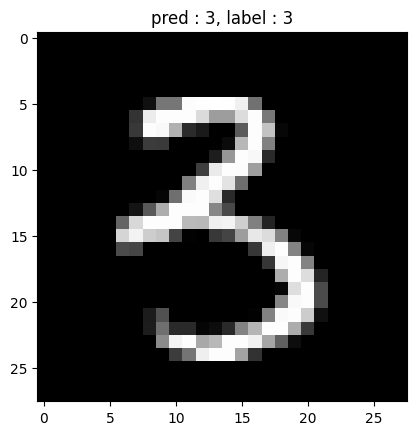

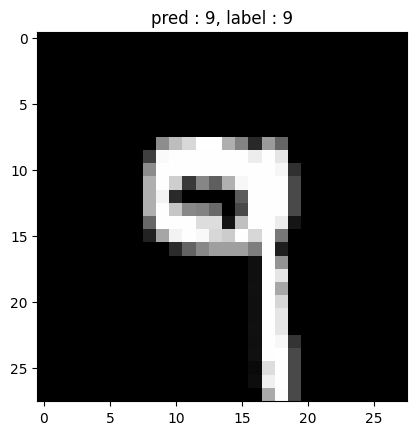

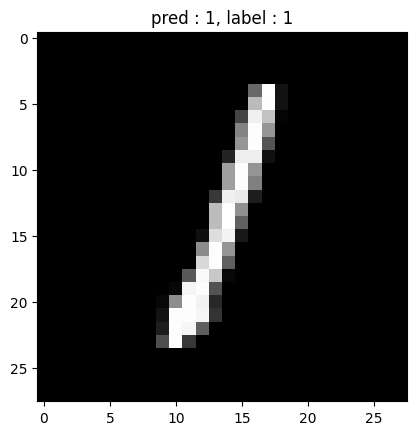

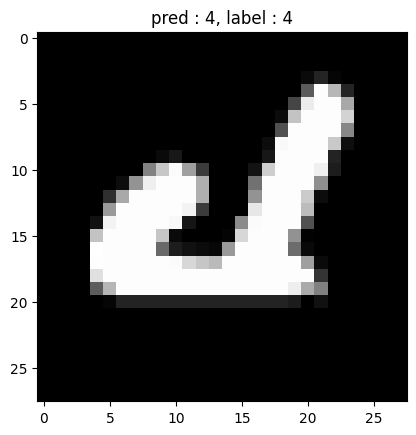

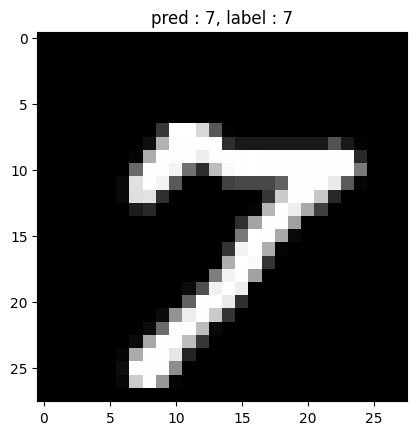

정확도 : 90.000000


In [9]:
mysum = 0

m = len(mnist_test)
cnt = 0
for i in range(m):
  image, label = mnist_test.__getitem__(i)
  output = model(image)

  if(i%1000==0):
    img = image.numpy()
    pred_label = np.argmax(output)
    plt.title("pred : %d, label : %d" %(pred_label, label))
    plt.imshow(img[0], cmap='gray')
    plt.show()

    cnt += 1
    mysum += (np.argmax(output) == label)
print("정확도 : %2f" %((float(mysum) / cnt) * 100.0))